In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.458 Seconds
Building M ...
	Done. Took 0.402 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 6.093
	Done. Took 6.162 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 0.299*(0.824)^t + -8.160*(-0.102)^t + 4.218*(0.087)^t + 1.578*(-0.240)^t + 2.064157 * delta(t,0)
		RMSE = 0.070
		Matlab: [ 0.3   0.82 -8.16 -0.1   4.22  0.09  1.58 -0.24]
	Done. Took 7.499 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: 1.772*(0.141)^t + -0.170*(0.817)^t + -7.069*(-0.108)^t + 2.211*(0.131)^t + 3.256604 * delta(t,0)
		RMSE = 0.036
		Matlab: [ 1.77  0.14 -0.17  0.82 -7.07 -0.11  2.21  0.13]
	Done. Took 11.332 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) MU <-- MSFT: 2.606*(0.048)^t + 0.636*(-0.029)^t + -2.579*(-0.031)^t + 8.141*(0.003)^t + -8.804449 * delta

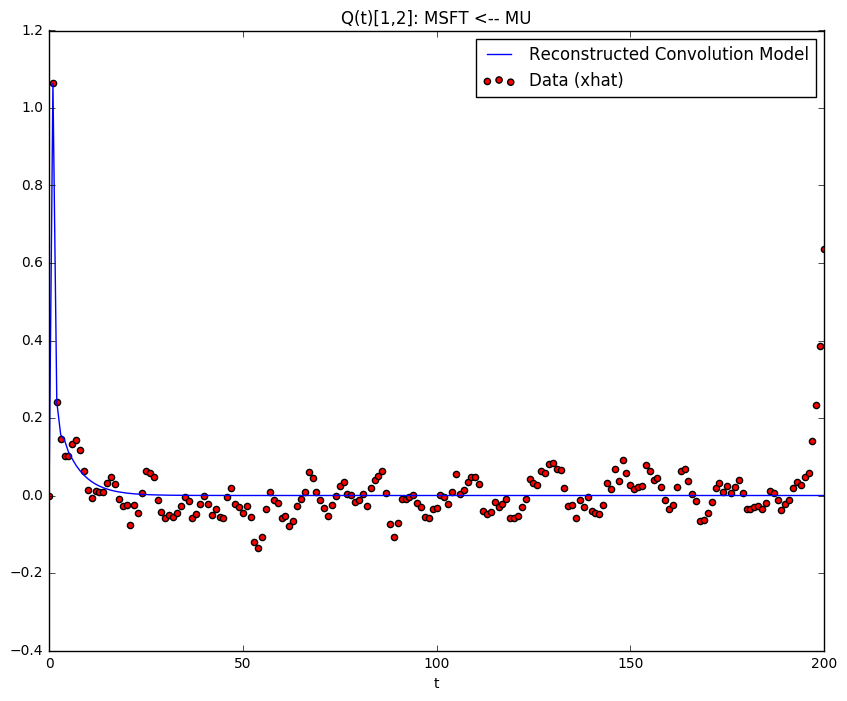

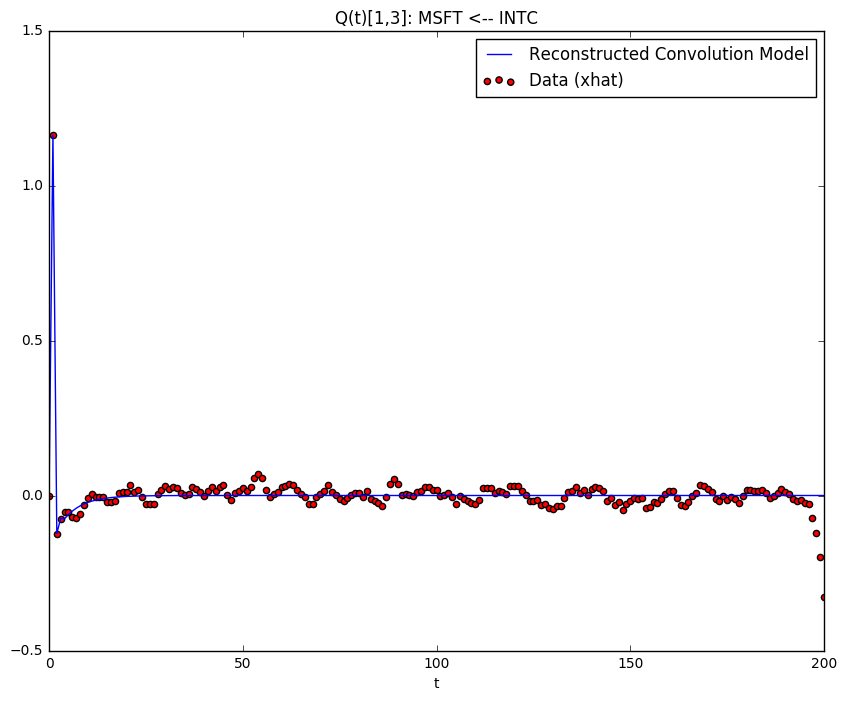

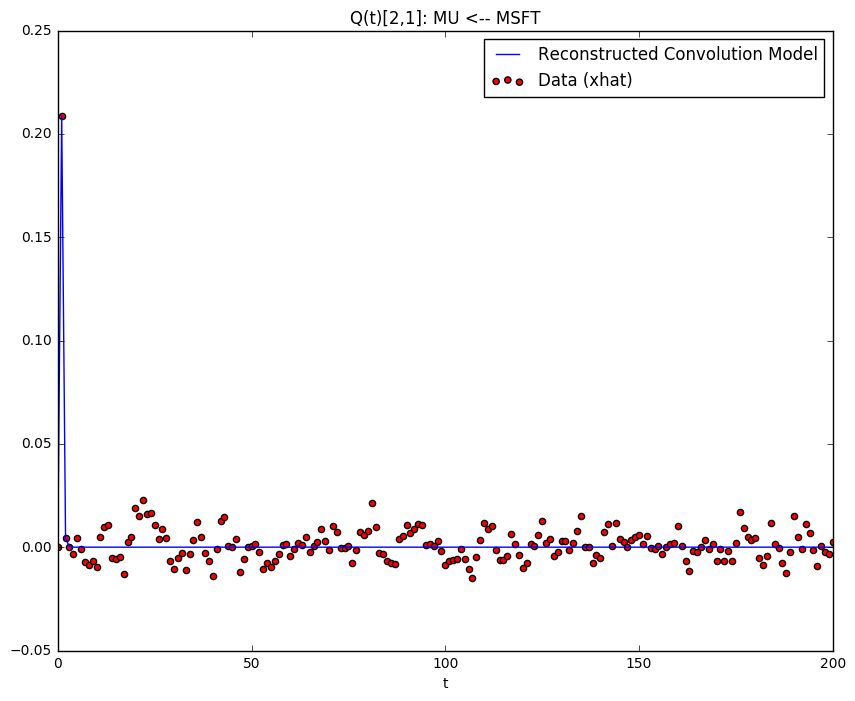

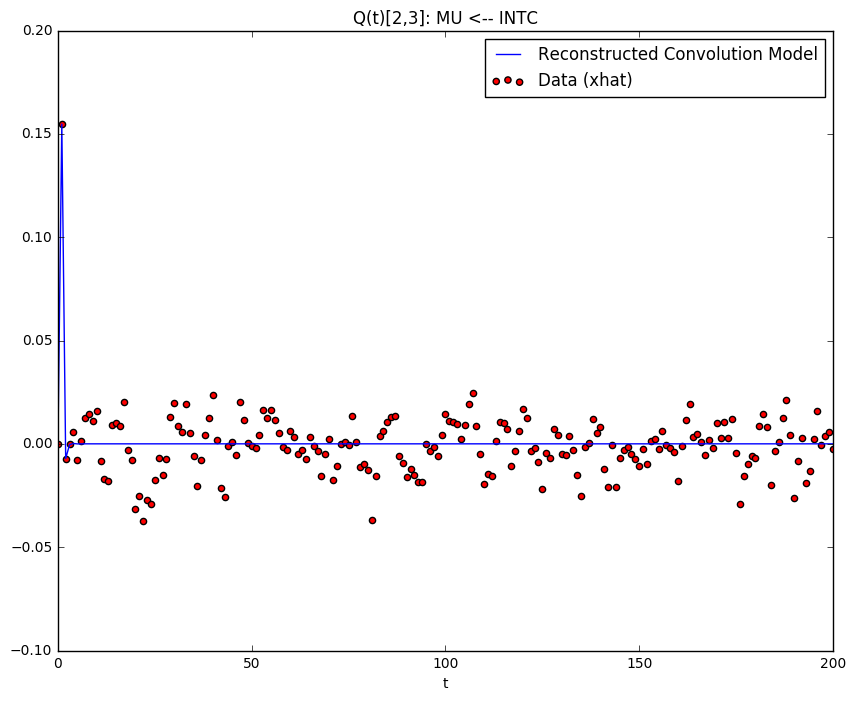

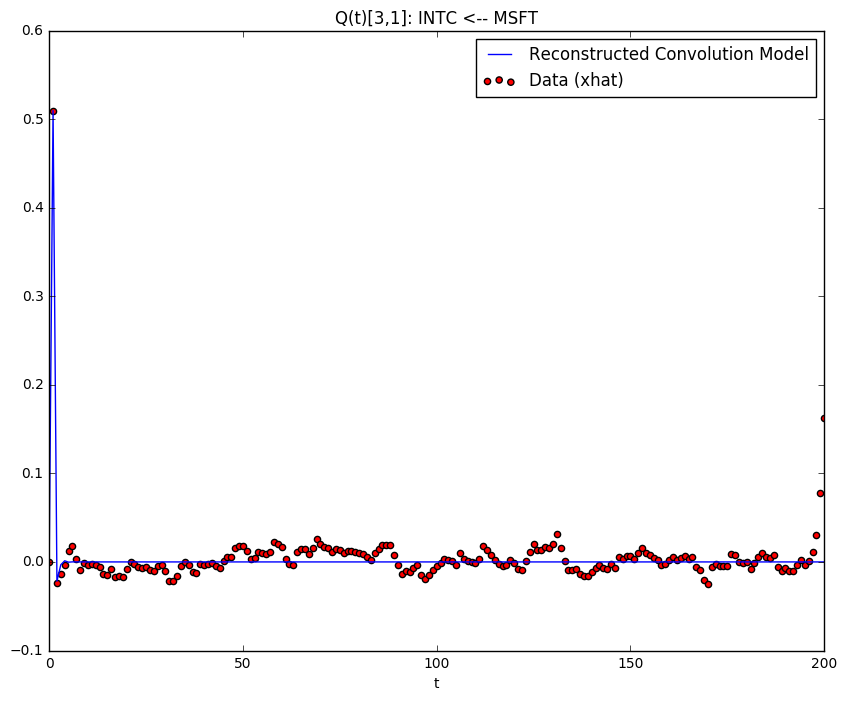

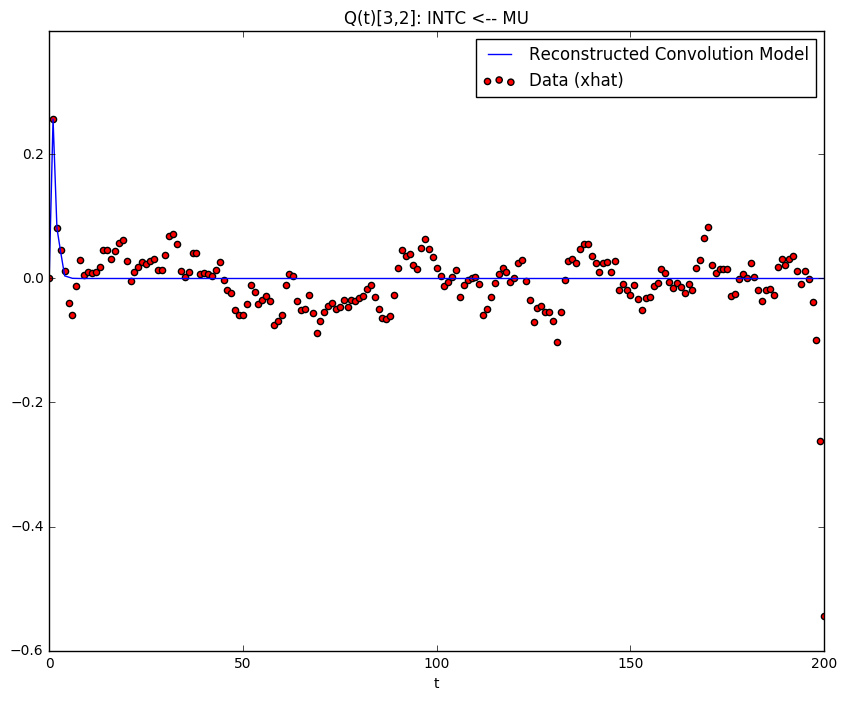

In [2]:
%matplotlib inline
cols = ['MSFT', 'MU', 'INTC']

y = pd.read_csv('tdf.csv', index_col=0, parse_dates=True)
y = y[cols].values

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([0.299071255853 0.824284921441 -8.15967647576 -0.101672167489 4.21846523277 0.0866451836646 1.577982806 -0.239886040077 ; 1.7716843763 0.140886729744 -0.169851579894 0.816670784088 -7.06910428943 -0.107904373184 2.21066781541 0.130614591862 ; 2.60640860618 0.0480161079637 0.636469452687 -0.0290840888773 -2.57945495679 -0.0307026232407 8.14102596298 0.00280155607111 ; 1.49284073173 -0.0123636502712 -3.16417057516 -0.0818801621514 0.587539000423 -0.15383952187 -0.839994474402 -0.00530115436496 ; -0.575288304229 0.0257506509942 2.2185341791 -0.17876666667 -2.61178010262 -0.0646077093677 -6.96731651963 -0.107963383004 ; 5.36558821481 -0.0414901299802 -1.43928094772 -0.209792527971 7.80711718753 -0.0422053507884 2.11933691515 0.239382584413], {'MSFT', 'MU', 'INTC'});


Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.447 Seconds
Building M ...
	Done. Took 0.466 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 1.776 Seconds
Extracting Qis ...
	Done. Took 0.002 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 6.412*(0.106)^t + -3.401*(-0.076)^t + -3.140*(-0.072)^t + -7.293*(-0.070)^t + 7.422514 * delta(t,0)
		RMSE = 0.039
		Matlab: [ 6.41  0.11 -3.4  -0.08 -3.14 -0.07 -7.29 -0.07]
	Done. Took 12.095 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: -0.651*(-0.115)^t + -0.656*(-0.026)^t + -4.578*(-0.057)^t + 3.780*(0.079)^t + 2.104564 * delta(t,0)
		RMSE = 0.020
		Matlab: [-0.65 -0.11 -0.66 -0.03 -4.58 -0.06  3.78  0.08]
	Done. Took 9.286 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) MU <-- MSFT: 5.862*(0.010)^t + -1.874*(-0.030)^t + 3.433*(0.019)^t + -0.645*(-0.010)^t + -6.774983 *

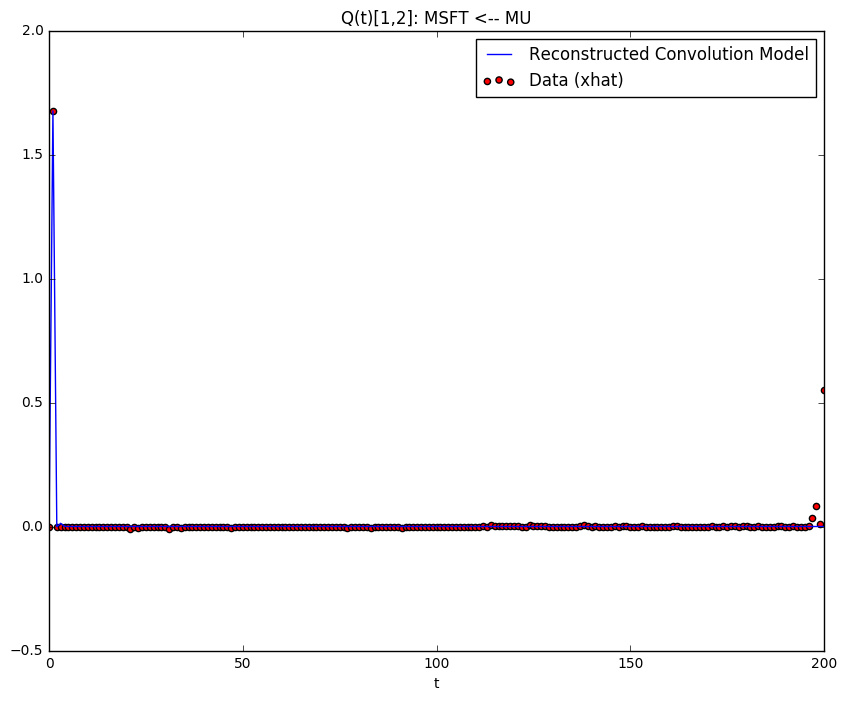

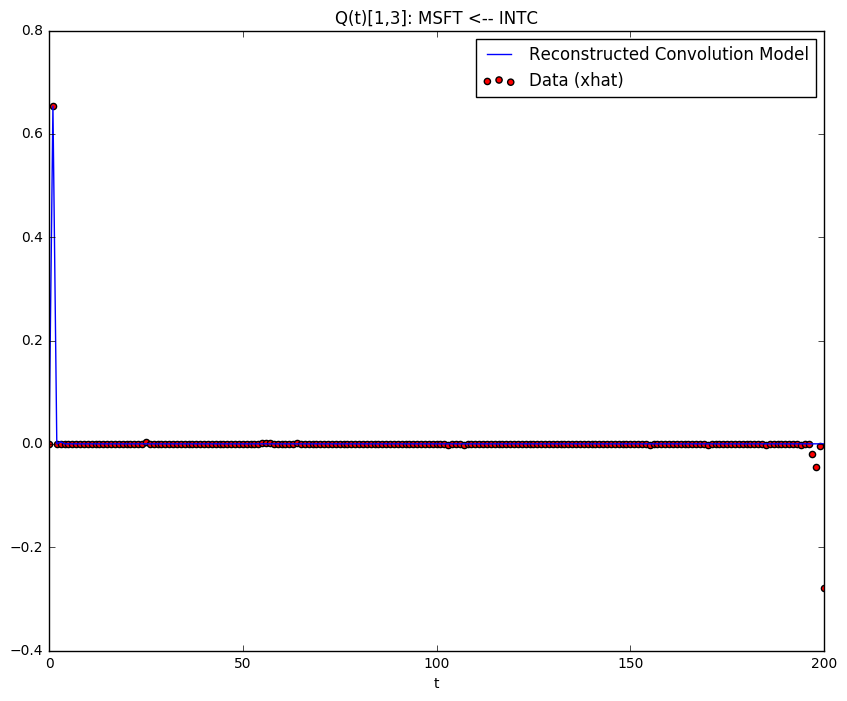

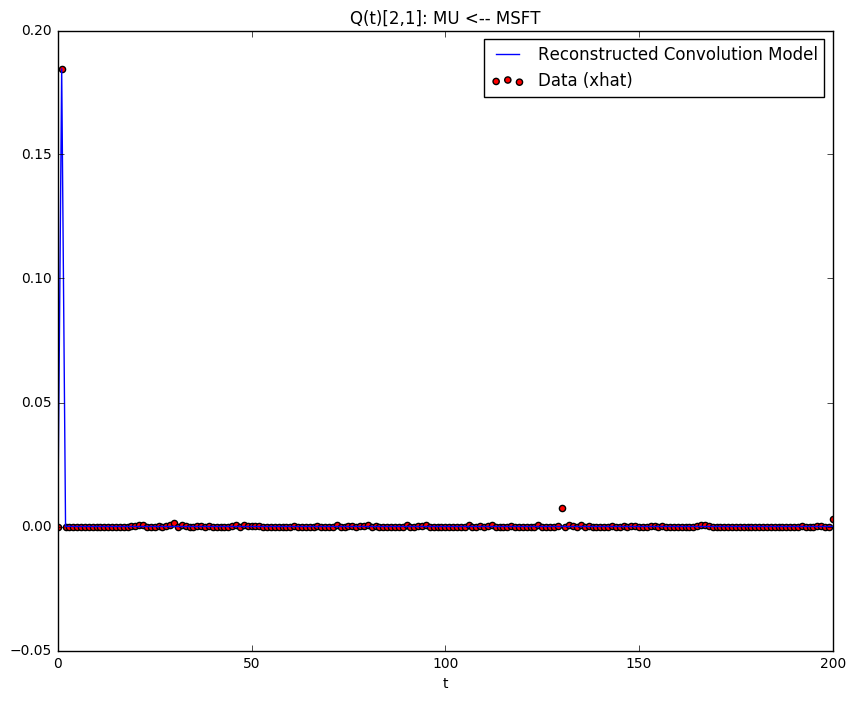

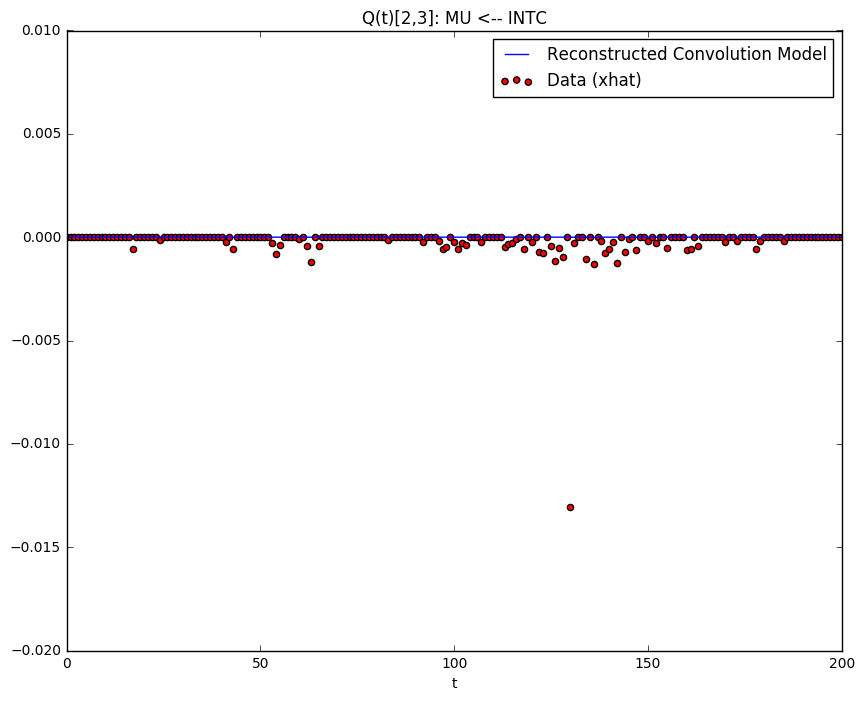

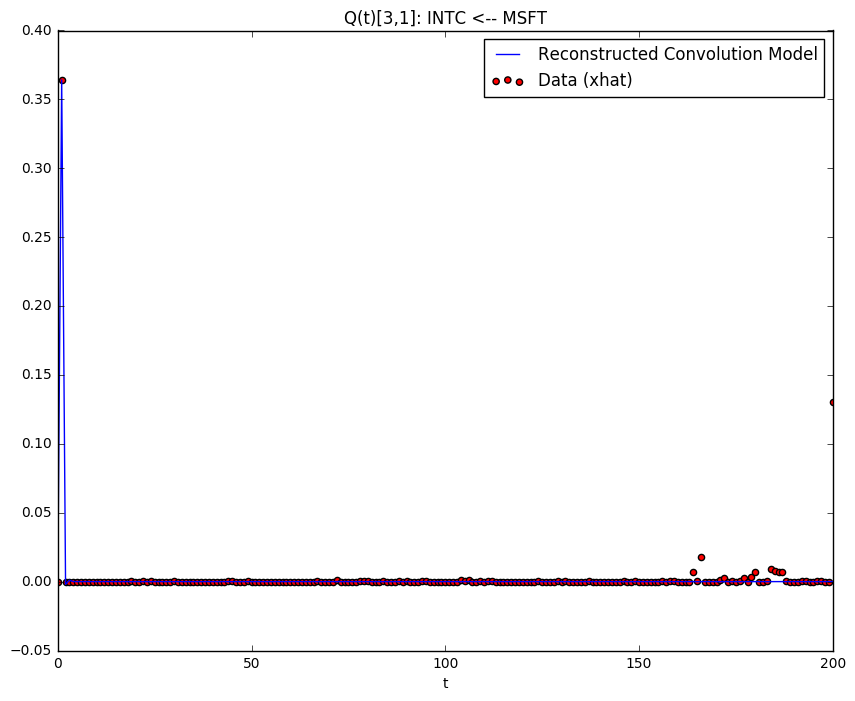

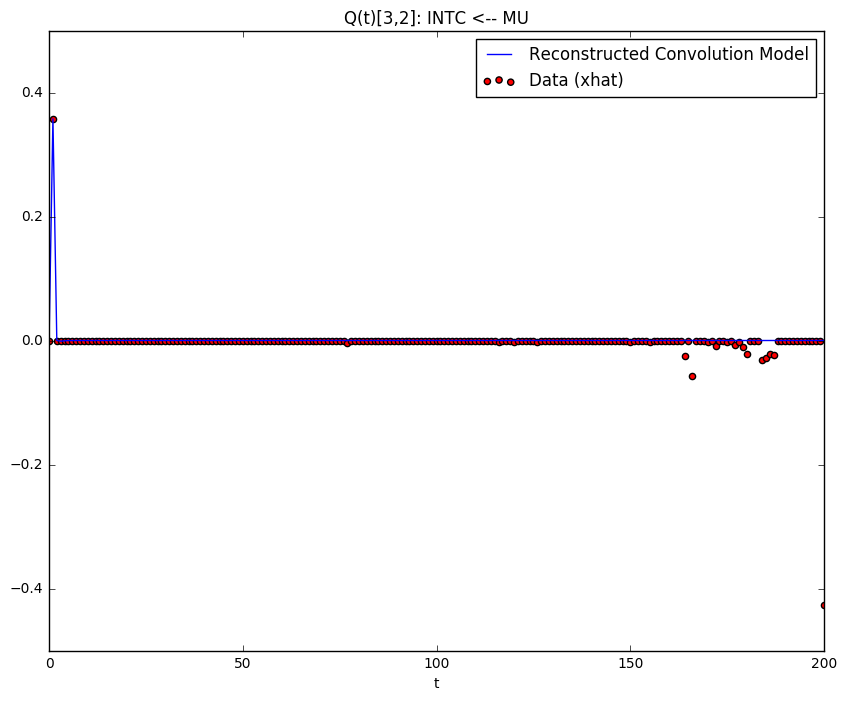

In [4]:
%matplotlib inline
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [5]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([6.41201096985 0.105624978252 -3.40103427747 -0.0762366302753 -3.13999230117 -0.0716148068372 -7.2934981985 -0.0704934819367 ; -0.651338258566 -0.1148415925 -0.655553968477 -0.0261936799912 -4.57811659137 -0.0570605157439 3.78044503923 0.0794487848303 ; 5.8621881244 0.00963857986357 -1.87443409799 -0.0301072698763 3.43253451034 0.0188976322179 -0.645305642338 -0.010428494206 ; 0.0240934733494 0.0168685184198 0.505969326427 0.0119038279249 2.16446788874 -0.00174774659224 -0.349247846074 0.00757725233314 ; 1.30391230081 0.0769729844343 3.48984672108 -0.033042319648 1.14890956631 0.00967874408438 -9.94203769577 -0.0370129283429 ; -0.950980825838 -0.0780598244575 -1.494583119 -0.0189356619077 6.37052858609 0.0849920763243 -2.07415777731 0.138113538502], {'MSFT', 'MU', 'INTC'});
